# THINGS TO IMPORT:-

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


## Step 1: Load and Preprocess Data


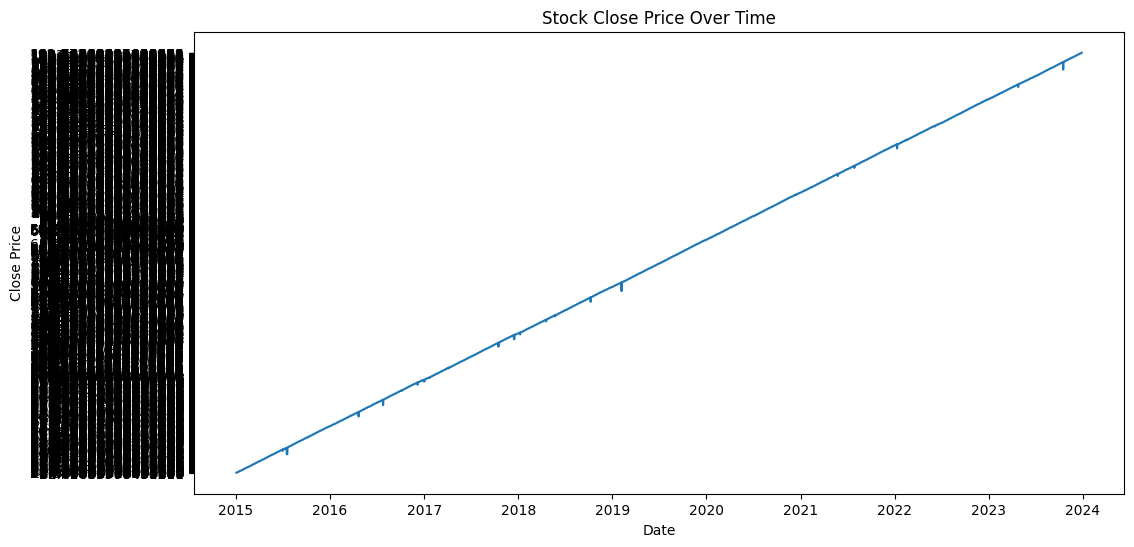

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock dataset
data = pd.read_csv('../data/raw/AAPL_stock.csv', parse_dates=['Date'], index_col='Date')

# Ensure daily frequency and fill missing values
data = data.asfreq('D')
data = data.ffill()

# Plot closing prices
plt.figure(figsize=(12,6))
plt.plot(data['Close'])
plt.title("Stock Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


## Step 2: Train-Test Split


In [11]:
# Split dataset into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]


## Step 3: Fit SARIMA Model


In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

# Ensure 'Close' column is numeric
train = data[:'2022'].copy()  # <–– THIS avoids the warning
train['Close'] = pd.to_numeric(train['Close'], errors='coerce')
train = train.dropna(subset=['Close'])

# Define the SARIMA model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Fit the SARIMA model
model = SARIMAX(train['Close'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)


## Step 4: Forecast and Evaluate with RMSE


In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Close'], forecast))
# Forecast future values
forecast = model_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = sqrt(mean_squared_error(test['Close'], forecast))
print(f"SARIMA RMSE: {rmse:.4f}")


SARIMA RMSE: 30.2075


## Step 5: Plot Forecast vs Actual


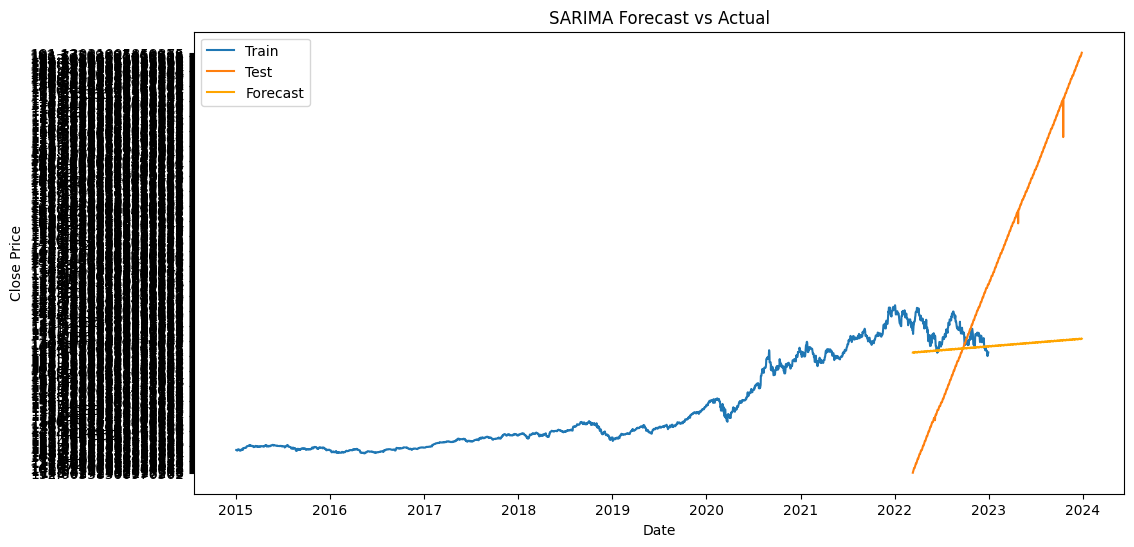

In [23]:
# Plot the actual and forecast values
plt.figure(figsize=(12,6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title("SARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()
